In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Attrition Data.csv')

#df.info()
df_HR = df.copy()
df_HR.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2


In [23]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']}

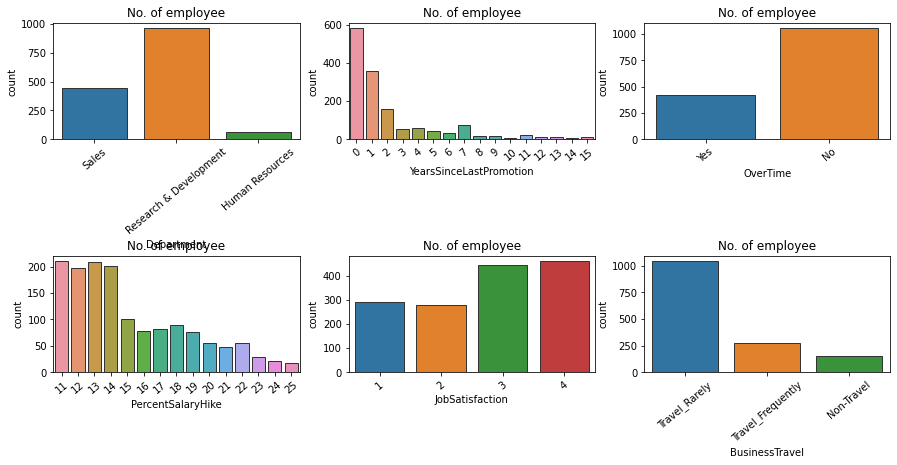

In [44]:
features=['Department','YearsSinceLastPromotion','OverTime','PercentSalaryHike','JobSatisfaction','BusinessTravel']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_HR,linewidth=1, edgecolor=".2")
    plt.xticks(rotation=40)
    plt.title("No. of employee")

In [25]:
df_EducationField = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
'''df_EF = df_EducationField.groupby(by="Field").sum()
df_EF['Field'] = df_EF.index (add the index as a column)'''




'df_EF = df_EducationField.groupby(by="Field").sum()\ndf_EF[\'Field\'] = df_EF.index (add the index as a column)'

In [26]:
df_Depart = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Department']==field].shape[0]
    df_Depart.loc[i] = (field, ratio*100)
    i += 1

In [27]:
df_Gender = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['Gender'].unique()):
    ratio = df_HR[(df_HR['Gender']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1

In [34]:
df_JR = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JR.loc[i] = (field, ratio*100)
    i += 1

In [35]:
df_BT = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['BusinessTravel']==field].shape[0]
    df_BT.loc[i] = (field, ratio*100)
    i += 1

In [37]:
df_MS = pd.DataFrame(columns=["x", "% of Leavers"])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_MS.loc[i] = (field, ratio*100)
    i += 1

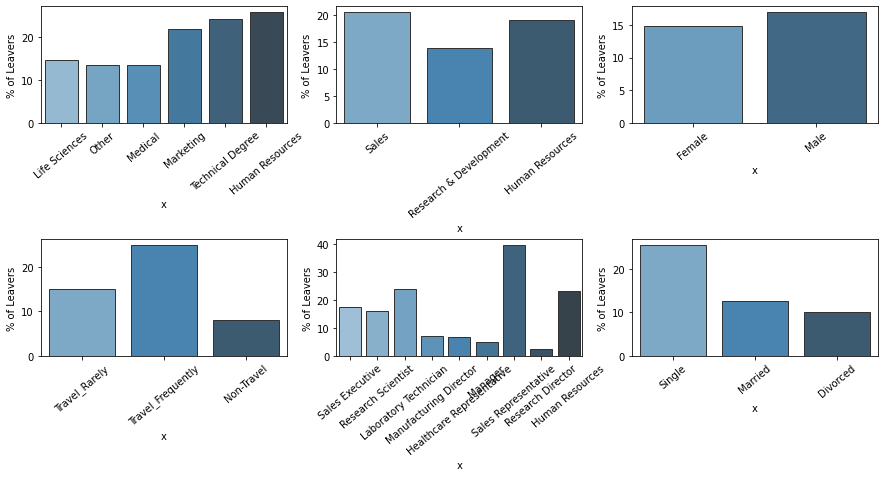

In [43]:
features=[df_EducationField,df_Depart,df_Gender,df_BT,df_JR,df_MS]
plt.figure(figsize=(15,15)) # this creates a figure 10 inch wide, 5 inch high
for k, j in enumerate(features):
    plt.subplot(4, 3, k+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.barplot( x="x", y="% of Leavers", data=j,palette="Blues_d",linewidth=1, edgecolor=".2")
    plt.xticks(rotation=40)

<AxesSubplot:xlabel='count', ylabel='Attrition'>

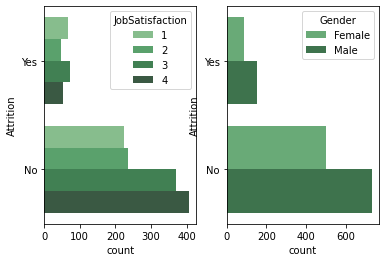

In [12]:
employees_left= df_HR[df_HR['Attrition']=='Yes']
employees_stay= df_HR[df_HR['Attrition']=='No']
plt.subplot(1, 2, 1)
sns.countplot(y='Attrition', hue='JobSatisfaction', data=df_HR, palette="Greens_d",orient="h")
plt.subplot(1, 2, 2)
sns.countplot(y='Attrition', hue='Gender', data=df_HR, palette="Greens_d",orient="h")

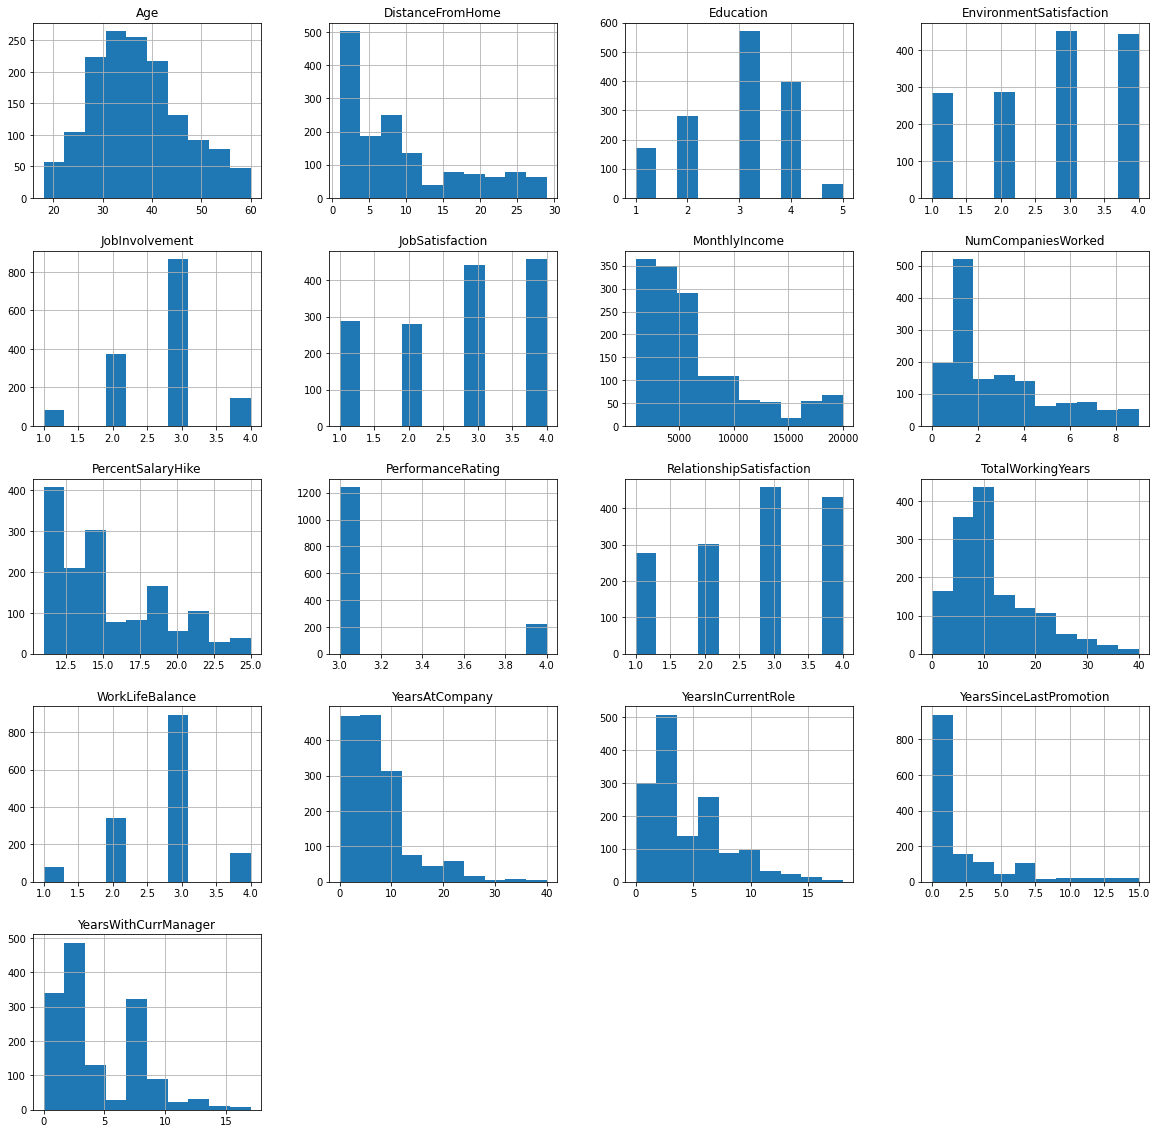

In [5]:
df_HR.hist(figsize=(20,20))
plt.show()

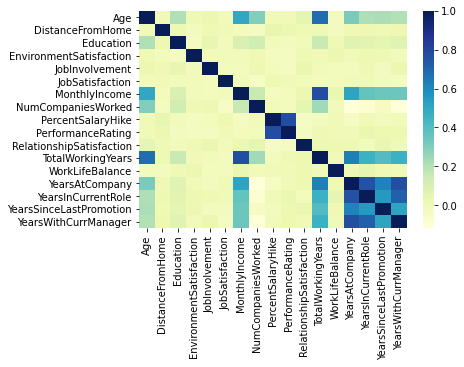

In [11]:
#print(df.corr())
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
mp.show()